In [3]:
import glob
import os
import numpy as np
import pypianoroll as pr
import pickle
import json
import math



In [2]:
os.chdir('../..')

In [64]:
pwd

'/mnt/md1/user_victor'

In [143]:
paths = []
for root, dirs, files in os.walk("./lead-sheet-dataset/datasets/pianoroll"):
    for file in files:
        if file.endswith(".npz"):
            path_to_symbol = "./lead-sheet-dataset/datasets/event/" + os.path.join(root, file)[40:-4] + "_symbol_nokey.json"
            ## Read .npz(midi) file 
            temp = pr.Multitrack(os.path.join(root, file))
            if len(temp.tracks) == 2:
#                 f = open(path_to_symbol)
#                 event = json.load(f)

#                 if event['metadata']['beats_in_measure'] == '4':
                paths.append(os.path.join(root, file))
                
                

In [144]:
len(paths)

17430

In [270]:
paths[2050]

'./lead-sheet-dataset/datasets/pianoroll/f/frode-fjellheim/vuelie/verse.npz'

In [140]:
os.path.join(root, paths[140])

'./lead-sheet-dataset/datasets/pianoroll/x/x-ambassadors/unsteady/bridge.npz'

In [271]:
path_npz = "./lead-sheet-dataset/datasets/pianoroll/j/jim-croce/bad-bad-leroy-brown/chorus.npz"
# path_midi_key = "./lead-sheet-dataset/datasets/pianoroll/t/the-clash/london-calling/verse-and-pre-chorus_symbol_nokey.mid"
path_midi_nokey = "./lead-sheet-dataset/datasets/pianoroll/j/jim-croce/bad-bad-leroy-brown/chorus_nokey.mid"
path_to_symbol = "./lead-sheet-dataset/datasets/event/j/jim-croce/bad-bad-leroy-brown/chorus_symbol_nokey.json"

path_npz = "./lead-sheet-dataset/datasets/pianoroll/j/jerry-goldsmith/star-trek-main-theme/bridge.npz"
path_midi_nokey = "./lead-sheet-dataset/datasets/pianoroll/j/jerry-goldsmith/star-trek-main-theme/bridge_nokey.mid"
path_to_symbol = "./lead-sheet-dataset/datasets/event/j/jerry-goldsmith/star-trek-main-theme/bridge_symbol_nokey.json"

path_npz = "./lead-sheet-dataset/datasets/pianoroll/f/frode-fjellheim/vuelie/verse.npz"
path_midi_nokey = "./lead-sheet-dataset/datasets/pianoroll/f/frode-fjellheim/vuelie/verse_nokey.mid"
path_to_symbol = "./lead-sheet-dataset/datasets/event/f/frode-fjellheim/vuelie/verse_symbol_nokey.json"


# path_to_roman = "./lead-sheet-dataset/datasets/event/" + os.path.join(root, file)[40:-4] + "_roman.json"
# print(path_to_symbol)
# print(path_to_roman)
beat_resolution = 24
beat_per_chord = 2

melody_data = []
chord_groundtruth = []
symbol_data = []
length = []
tempos = []
downbeats = []
roman_data = []
sec_data = []
borrowed_data = []
mode_data = []
max_melody_len = 0
max_chord_len = 0
max_event_off = 0
error = 0

npz = pr.Multitrack(path_npz)
# midi_key = pr.Multitrack(path_midi_key)
midi_nokey = pr.Multitrack(path_midi_nokey)

if len(npz.tracks) == 2:
    melody = npz.tracks[0]
    # print(melody.pianoroll)
    print('melody pianoroll shape',melody.pianoroll.shape)
    if max_melody_len < melody.pianoroll.shape[0]:
        max_melody_len = melody.pianoroll.shape[0]

    chord = npz.tracks[1]
    chord_list = []
    for i in range(chord.pianoroll.shape[0]):
        if i % ( beat_resolution * beat_per_chord + 1) == 0:
            chord_list.append(chord.pianoroll[i])

    chord_np = np.asarray(chord_list)
    # print(chord_np)
    print('chord pianorolll shape',chord_np.shape)
    if max_chord_len < chord_np.shape[0]:
        max_chord_len = chord_np.shape[0]

    melody_data.append(melody.pianoroll)
    chord_groundtruth.append(chord_np)
    length.append(chord_np.shape[0])
    print('tempo shape',npz.tempo.shape)
    tempos.append(npz.tempo)
    print('downbeat shape',npz.downbeat.shape)
    downbeats.append(npz.downbeat)

    

melody pianoroll shape (1560, 128)
chord pianorolll shape (32, 128)
tempo shape (1560,)
downbeat shape (1560,)


In [170]:
384 / 24 

16.0

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>,
        <AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>],
       dtype=object))

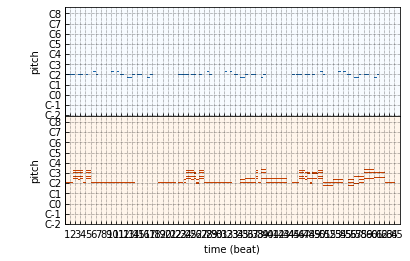

In [273]:
midi_nokey.plot()

In [171]:
tempo = midi_nokey.tempo
downbeat = midi_nokey.downbeat
track1 = pr.Track(pianoroll=midi_nokey.tracks[0].pianoroll)
track2 = pr.Track(pianoroll=midi_nokey.tracks[1].pianoroll)

midi = pr.Multitrack(tracks=[track1, track2], tempo=tempo, downbeat=downbeat, beat_resolution=24)
midi.downbeat[0::midi.beat_resolution*6] = True
# pr.write(generate, result_dir + '/generate_' + str(counter) + '.mid')


In [172]:
pr.write(midi, 'test.mid')

In [272]:
accompany_pianoroll_frame = []
chord_groundtruth_frame = []
for acc_song, truth_song in zip(accompany_pianoroll, chord_groundtruth):
    acc_pianoroll = []
    truth_pianoroll = []
    for acc_beat, truth_beat in zip(acc_song, truth_song):
        for i in range(Constants.BEAT_RESOLUTION * Constants.BEAT_PER_CHORD):
            acc_pianoroll.append(acc_beat)
            truth_pianoroll.append(truth_beat)
    accompany_pianoroll_frame.append(acc_pianoroll)
    chord_groundtruth_frame.append(truth_pianoroll)

accompany_pianoroll_frame = np.asarray(accompany_pianoroll_frame).astype(int)
chord_groundtruth_frame = np.asarray(chord_groundtruth_frame)

NameError: name 'accompany_pianoroll' is not defined

In [55]:
midi.tracks[0].pianoroll.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [338]:
f = open(path_to_symbol)
event = json.load(f)
event_on = []
event_off = []
symbol = []

warping_factor = int(event['metadata']['BPM']) // int(npz.tempo[0])

pos = 0
event_head = []

for chord in event['tracks']['chord']:
    if chord != None:
#         pos = pos + (chord['event_duration'] / warping_factor)
        pos = chord['event_on'] / warping_factor
#         event_head.append(pos)
        event_on.append(pos)
        event_off.append(chord['event_off'] / warping_factor)
        symbol.append(chord['symbol'])
#     else: 
#         event_head.append(-1)
#         symbol.append('')

# event_head = event_head[:-1]
symbol_list = []
q_index = [2 * i for i in range(len(chord_list))]  

for i in range(len(q_index)):
    if q_index[i] in event_on:
#         print(event_head.index(q_index[i]))
        symbol_list.append(symbol[event_on.index(q_index[i])])
    
    else:
        
#         for i in range(len(symbol)):
#             for j in range(event_on[i], event_off[i]):
#                 symbol_list[j] = symbol[i]
                
        if i == q_index[-1]:
            symbol_list.append(symbol[-1])
        
        else:
#         if -1 in [n for n in event_head if n <= q_index[i] and n > q_index[i-1]]:
#             symbol_list.append('')
        
#         else0
            count = 0
            for k in range(len(symbol)):
                if q_index[i] > event_on[k] and q_index[i] < event_off[k]:


    #         lower = max(n for n in event_on if n <= q_index[i] and n != -1)
    #         upper = min(n for n in event_on if n <= q_index[i] and n != -1)
    #         neighbor_i = event_head.index(closest)
    #             print(neighbor_i)
                    symbol_list.append(symbol[k])
                    count += 1
                    break

            if count == 0:
                symbol_list.append('')


# symbol_data.append(symbol_list)



In [324]:
print(symbol)

['G sus4', 'G7 | F sus4', 'C | E (add9)', 'G7 | F sus4', 'G sus4', 'G7 | F sus4', 'G sus4', 'G sus4', 'G sus4', 'G sus4', 'G sus4', 'C | G (add9)', 'G7 | F sus4', 'C | E (add9)', 'Cmaj7 | F sus4', 'Cmaj7 | G', 'G7 | F sus4', 'G sus4', 'G sus4', 'C | G', 'C | G sus4', 'G7 | F sus4', 'G sus4', 'Fmaj7', 'G7 sus4', 'G sus4', 'G7 | F sus4', 'C | E', 'F sus4', 'Cmaj7 | G sus4', 'F sus4', 'G7 | F sus4', 'dm7 | G sus4', 'C | G', 'am', 'G | B', 'C', 'Fmaj7', 'D7', 'G sus4']


In [325]:
print(event_off)

[1.5, 2.5, 3.0, 3.5, 4.0, 5.0, 13.5, 19.5, 21.0, 21.5, 23.0, 23.5, 24.5, 25.0, 25.5, 26.0, 27.0, 32.0, 32.5, 35.0, 37.0, 37.5, 38.0, 39.0, 43.0, 45.5, 46.5, 47.0, 47.5, 48.0, 49.0, 50.0, 52.0, 54.0, 56.0, 57.0, 58.0, 60.0, 62.0, 64.0]


In [314]:
print(event_on)

[0.0, 1.5, 2.5, 3.0, 3.5, 4.0, 5.0, 18.0, 19.5, 21.0, 22.0, 23.0, 23.5, 24.5, 25.0, 25.5, 26.0, 27.0, 32.0, 34.0, 35.0, 37.0, 37.5, 38.0, 39.0, 44.0, 45.5, 46.5, 47.0, 47.5, 48.0, 49.0, 50.0, 52.0, 55.0, 56.0, 57.0, 58.0, 60.0, 62.0]


In [339]:
symbol_list

['G sus4',
 'G7 | F sus4',
 'G7 | F sus4',
 'G sus4',
 'G sus4',
 'G sus4',
 'G sus4',
 '',
 '',
 'G sus4',
 'G sus4',
 'G sus4',
 'G7 | F sus4',
 'G7 | F sus4',
 'G sus4',
 'G sus4',
 'G sus4',
 'C | G',
 'C | G sus4',
 'Fmaj7',
 'G7 sus4',
 'G7 sus4',
 'G sus4',
 'G7 | F sus4',
 'F sus4',
 'dm7 | G sus4',
 'C | G',
 '',
 'G | B',
 'Fmaj7',
 'D7',
 'G sus4']

In [337]:
symbol

['G sus4',
 'G7 | F sus4',
 'C | E (add9)',
 'G7 | F sus4',
 'G sus4',
 'G7 | F sus4',
 'G sus4',
 'G sus4',
 'G sus4',
 'G sus4',
 'G sus4',
 'C | G (add9)',
 'G7 | F sus4',
 'C | E (add9)',
 'Cmaj7 | F sus4',
 'Cmaj7 | G',
 'G7 | F sus4',
 'G sus4',
 'G sus4',
 'C | G',
 'C | G sus4',
 'G7 | F sus4',
 'G sus4',
 'Fmaj7',
 'G7 sus4',
 'G sus4',
 'G7 | F sus4',
 'C | E',
 'F sus4',
 'Cmaj7 | G sus4',
 'F sus4',
 'G7 | F sus4',
 'dm7 | G sus4',
 'C | G',
 'am',
 'G | B',
 'C',
 'Fmaj7',
 'D7',
 'G sus4']

In [196]:
[2*i for i in range(len(chord_list))]  

[0, 2, 4, 6, 8, 10, 12, 14]

In [202]:
event_head.index(1.5)

ValueError: 1.5 is not in list

In [153]:
print('symbol length',len(symbol_list))
symbol_list

symbol length 8


['E', 'E', 'dbm', 'Amaj7 | E sus4', 'F', 'G7 | F', 'G | D', 'G sus42']

In [168]:
chord_list[4]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 100,   0,   0,   0, 100,   0,   0, 100,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [19]:
24 * 4 * 8

768